# Today's agenda

1. A bit more about indexes
2. `value_counts`
3. Strings in Pandas and the `str` proxy object
4. Plotting in Pandas
5. DataFrames — creating them, editing them, selecting from them
6. Reading from and writing to files (especially CSV)
7. Plotting data frames
8. Special kinds of plots — scatter plots — on data frames

In [1]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [3]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
s.index = [100, 200, 300, 400, 500]
s

100    10
200    20
300    30
400    40
500    50
dtype: int64

In [5]:
s.index

Int64Index([100, 200, 300, 400, 500], dtype='int64')

In [6]:
s.index.values

array([100, 200, 300, 400, 500])

In [7]:
s.index = list('abcde')
s

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [8]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [9]:
s.index = pd.RangeIndex(100, 110, 2)

In [10]:
s

100    10
102    20
104    30
106    40
108    50
dtype: int64

In [11]:
s.index

RangeIndex(start=100, stop=110, step=2)

In [12]:
s.loc[104] # use 104 as the index to look up a value

30

In [13]:
s.iloc[4]  # count from the start, to the 4th (starting with 0) item

50

In [14]:
# value_counts

s = Series([10, 20, 30, 20, 30, 40, 30, 40, 40, 40, 50, 60, 70, 50, 70,90])
s

0     10
1     20
2     30
3     20
4     30
5     40
6     30
7     40
8     40
9     40
10    50
11    60
12    70
13    50
14    70
15    90
dtype: int64

In [15]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

In [16]:
# what are the three most common values in s?

s.value_counts().head(3)

40    4
30    3
70    2
dtype: int64

In [18]:
s.value_counts().head(3).index.values

array([40, 30, 70])

In [20]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

In [23]:
s.value_counts(normalize=True)

40    0.2500
30    0.1875
70    0.1250
20    0.1250
50    0.1250
60    0.0625
10    0.0625
90    0.0625
dtype: float64

In [24]:
s = Series([10, 20, 30, 40, 50, 60, 70])
s

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int64

In [25]:
s = Series([10, 20, 30, 40, 50, 60, 70], dtype=np.int16)
s

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int16

In [26]:
s = Series([10, 20, 30, 40.2, 50, 60, 70])
s

0    10.0
1    20.0
2    30.0
3    40.2
4    50.0
5    60.0
6    70.0
dtype: float64

In [27]:
a = np.array('this is a very interesting demo'.split())
a

array(['this', 'is', 'a', 'very', 'interesting', 'demo'], dtype='<U11')

In [28]:
s = Series('this is a very interesting demo'.split())
s


0           this
1             is
2              a
3           very
4    interesting
5           demo
dtype: object

In [29]:
len(s)

6

In [30]:
for one_item in s:
    print(f'{one_item}: {len(one_item)}')

this: 4
is: 2
a: 1
very: 4
interesting: 11
demo: 4


In [31]:
# the .str proxy on a series lets us apply a string method to every string in the series

s.str

In [32]:
s.str.len()

0     4
1     2
2     1
3     4
4    11
5     4
dtype: int64

In [33]:
s = Series('10 20 30 abcd 50 60 70'.split())
s

0      10
1      20
2      30
3    abcd
4      50
5      60
6      70
dtype: object

In [34]:
s.astype(np.int64)

ValueError: invalid literal for int() with base 10: 'abcd'

In [35]:
# I want to get the mean of the numbers in series s
s

0      10
1      20
2      30
3    abcd
4      50
5      60
6      70
dtype: object

In [36]:
s.sum()

'102030abcd506070'

In [37]:
s.str.isdigit()

0     True
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

In [38]:
s[s.str.isdigit()]

0    10
1    20
2    30
4    50
5    60
6    70
dtype: object

In [39]:
s[s.str.isdigit()].astype(np.int64)

0    10
1    20
2    30
4    50
5    60
6    70
dtype: int64

# Exercises: Pandas and strings

1. Create a series containing 10 words of varying lengths.
2. Find the words whose length is odd.
3. Find the words whose length is shorter than the mean.
4. Find the words (if any) that contain both 'a' and 'e'.  (Hint: Use the "contains" method)

In [40]:
s = Series('this is a fantastic demonstration of a few interesting words'.split())
s

0             this
1               is
2                a
3        fantastic
4    demonstration
5               of
6                a
7              few
8      interesting
9            words
dtype: object

In [44]:
s[s.str.len() % 2 == 1]

2                a
3        fantastic
4    demonstration
6                a
7              few
8      interesting
9            words
dtype: object

In [47]:
s[s.str.len() < s.str.len().mean()]

0     this
1       is
2        a
5       of
6        a
7      few
9    words
dtype: object

In [50]:
s[s.str.contains('a')  & s.str.contains('e')]

4    demonstration
dtype: object

In [51]:
# regular expressions

# https://RegexpCrashCourse.com/  

In [53]:
s[s.str.contains('a.*e|e.*a')]

4    demonstration
dtype: object

In [54]:
help(s.str.contains)

Help on method contains in module pandas.core.strings:

contains(pat, case=True, flags=0, na=nan, regex=True) method of pandas.core.strings.StringMethods instance
    Test if pattern or regex is contained within a string of a Series or Index.
    
    Return boolean Series or Index based on whether a given pattern or regex is
    contained within a string of a Series or Index.
    
    Parameters
    ----------
    pat : str
        Character sequence or regular expression.
    case : bool, default True
        If True, case sensitive.
    flags : int, default 0 (no flags)
        Flags to pass through to the re module, e.g. re.IGNORECASE.
    na : default NaN
        Fill value for missing values.
    regex : bool, default True
        If True, assumes the pat is a regular expression.
    
        If False, treats the pat as a literal string.
    
    Returns
    -------
    Series or Index of boolean values
        A Series or Index of boolean values indicating whether the
        gi

In [55]:
s = Series([10, 20, 30, 20, 30, 40, 50, 30, 10])

s

0    10
1    20
2    30
3    20
4    30
5    40
6    50
7    30
8    10
dtype: int64

<AxesSubplot:>

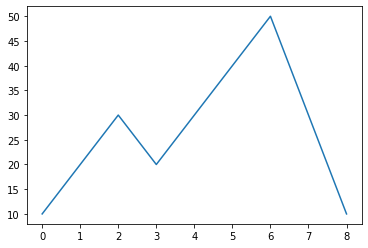

In [56]:
s.plot()